### Problem statement: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Importing Skin Cancer Data & Importing all the important libraries

In [6]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
# Defining the path for train and test images

data_dir_train = pathlib.Path('/content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [8]:
#Retrieve number of images present in train dataset and test dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility

**Create a dataset**

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## train dataset
## Using seed=123
## resize images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [11]:
## Validation dataset here
## Using seed=123
## resize images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

Visualize one instance of all the nine classes present in the dataset

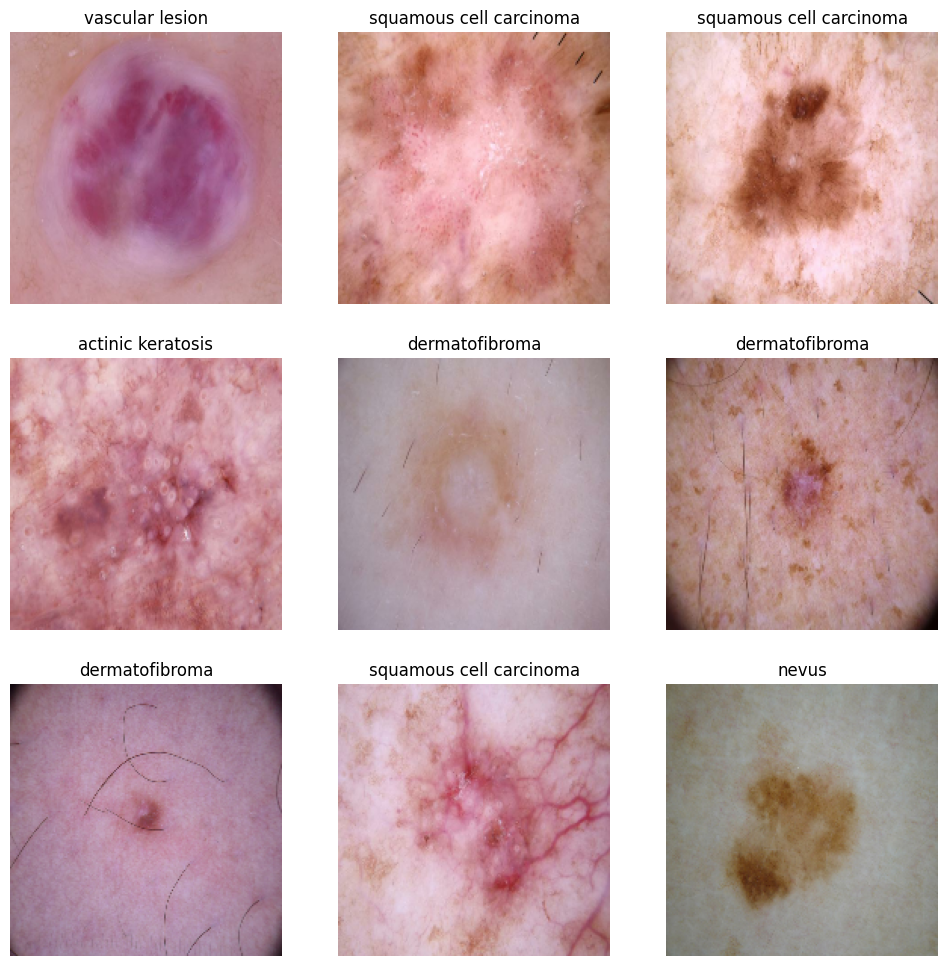

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.imshow(images[i].numpy().astype("uint8"))


In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

### Model 1
#### Create a CNN model, which can accurately detect 9 classes present in the dataset.

In [16]:
tot_classes = 9

model1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(tot_classes)
])


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [16]:
### Choose an appropriate optimiser and loss function
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

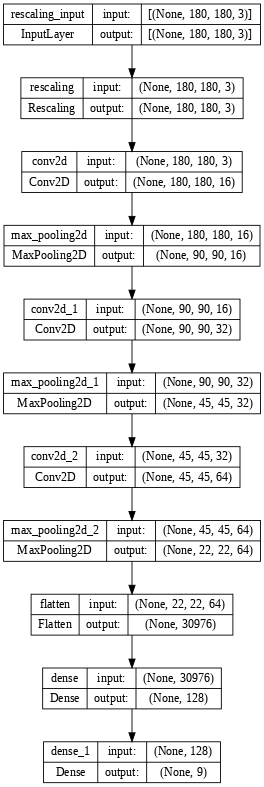

In [18]:
tf.keras.utils.plot_model(model1, show_shapes=True, dpi=64)

### Train the model

In [19]:
epochs = 20

history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 1714s 2s/step - loss: 1.6203 - accuracy: 0.3732 - val_loss: 1.2805 - val_accuracy: 0.5171
Epoch 2/20
281/281 [==============================] - 373s 1s/step - loss: 1.1442 - accuracy: 0.5802 - val_loss: 0.9420 - val_accuracy: 0.6582
Epoch 3/20
281/281 [==============================] - 373s 1s/step - loss: 0.7972 - accuracy: 0.7177 - val_loss: 0.8933 - val_accuracy: 0.7009
Epoch 4/20
281/281 [==============================] - 355s 1s/step - loss: 0.5531 - accuracy: 0.8049 - val_loss: 0.7316 - val_accuracy: 0.7543
Epoch 5/20
281/281 [==============================] - 375s 1s/step - loss: 0.4037 - accuracy: 0.8619 - val_loss: 0.5735 - val_accuracy: 0.8158
Epoch 6/20
281/281 [==============================] - 374s 1s/step - loss: 0.2737 - accuracy: 0.9037 - val_loss: 0.4969 - val_accuracy: 0.8549
Epoch 7/20
281/281 [==============================] - 361s 1s/step - loss: 0.2166 - accuracy: 0.9218 - val_loss: 0.5469 - val_accuracy: 0.850

Visualizing the results

In [20]:
## Define function to visualize results
def results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()


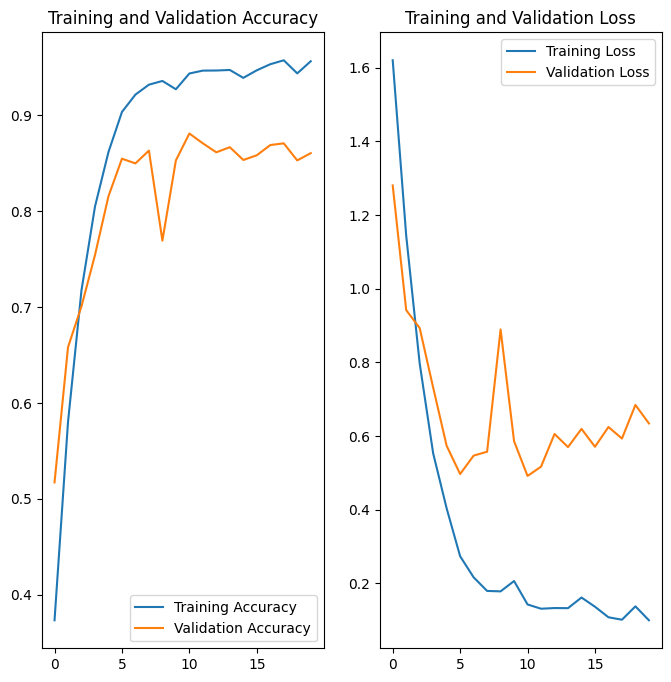

In [21]:
results(history)

### **Findings from Model1**
From the graph we can see training accuracy is very high as compared to validation accuracy.This is a clear case of overfitting where model has learned too much from training dataset and it is not able to perform well on the validation dataset.
  - **Training Accuracy:** 95.63
  - **Validation Accuracy:** 86.07

In [22]:
# Choose an appropriate data augumentation strategy.

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

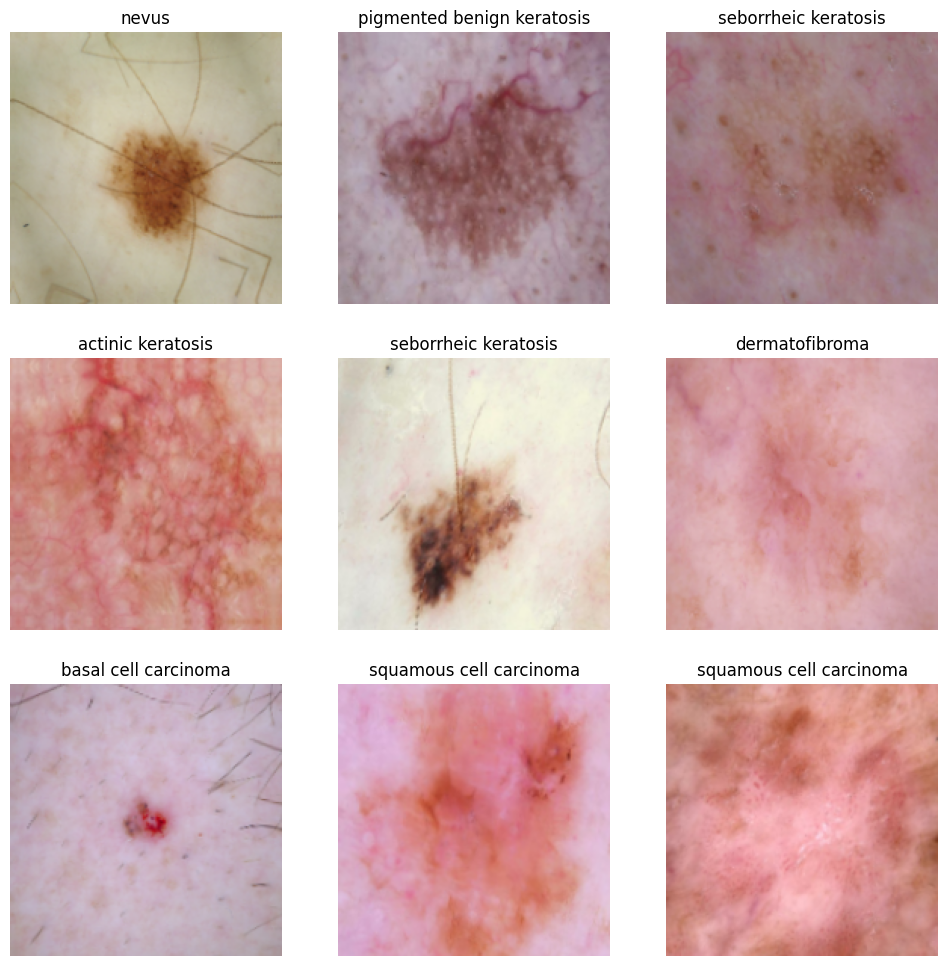

In [23]:
# Visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



### Create the model, compile and train the model
### Model 2

In [24]:
## We can use Dropout layer as there is an evidence of overfitting in our findings

model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(tot_classes)
])

### Compiling the model

In [25]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [26]:
epochs = 20

history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
281/281 [==============================] - 409s 1s/step - loss: 1.7482 - accuracy: 0.3268 - val_loss: 1.4433 - val_accuracy: 0.4459
Epoch 2/20
281/281 [==============================] - 404s 1s/step - loss: 1.4242 - accuracy: 0.4424 - val_loss: 1.2658 - val_accuracy: 0.5109
Epoch 3/20
281/281 [==============================] - 422s 2s/step - loss: 1.2869 - accuracy: 0.5040 - val_loss: 1.2995 - val_accuracy: 0.5051
Epoch 4/20
281/281 [==============================] - 399s 1s/step - loss: 1.2063 - accuracy: 0.5368 - val_loss: 1.1419 - val_accuracy: 0.5754
Epoch 5/20
281/281 [==============================] - 399s 1s/step - loss: 1.1204 - accuracy: 0.5693 - val_loss: 1.0553 - val_accuracy: 0.6044
Epoch 6/20
281/281 [==============================] - 417s 1s/step - loss: 1.0295 - accuracy: 0.6031 - val_loss: 0.9826 - val_accuracy: 0.6364
Epoch 7/20
281/281 [==============================] - 422s 2s/step - loss: 0.9596 - accuracy: 0.6319 - val_loss: 0.9432 - val_accuracy: 0.6551

Visualizing the results¶

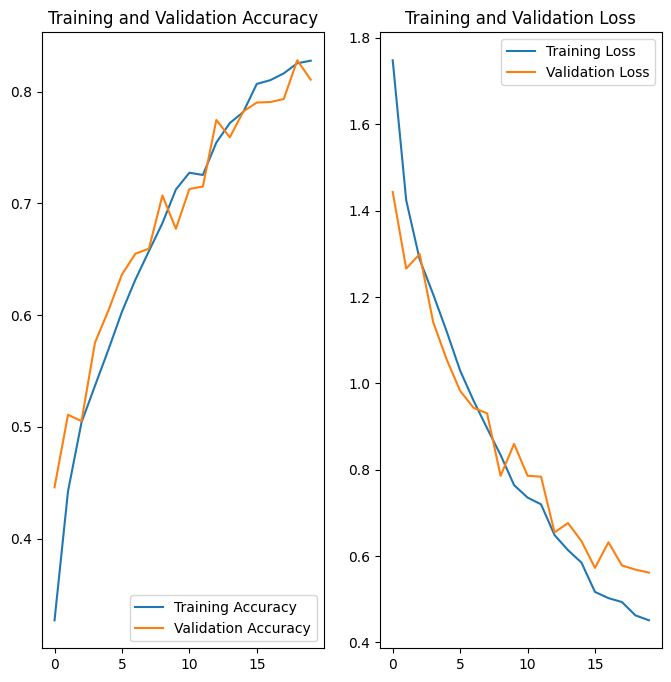

In [27]:
results(history)

#### **Findings from Model 2**
Accuracy of trainings has not improved as compared to base model but gap between training accuracy and validation accuracy is reduced. Also validation accuracy is increased slightly compared to base model. Gap between loss of training and validation is also reduced. And we observe that overfitting issue has been reduced due to data augmentation.
- **Training Accuracy:** 82.78
- **Validation Accuracy:** 81.09

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

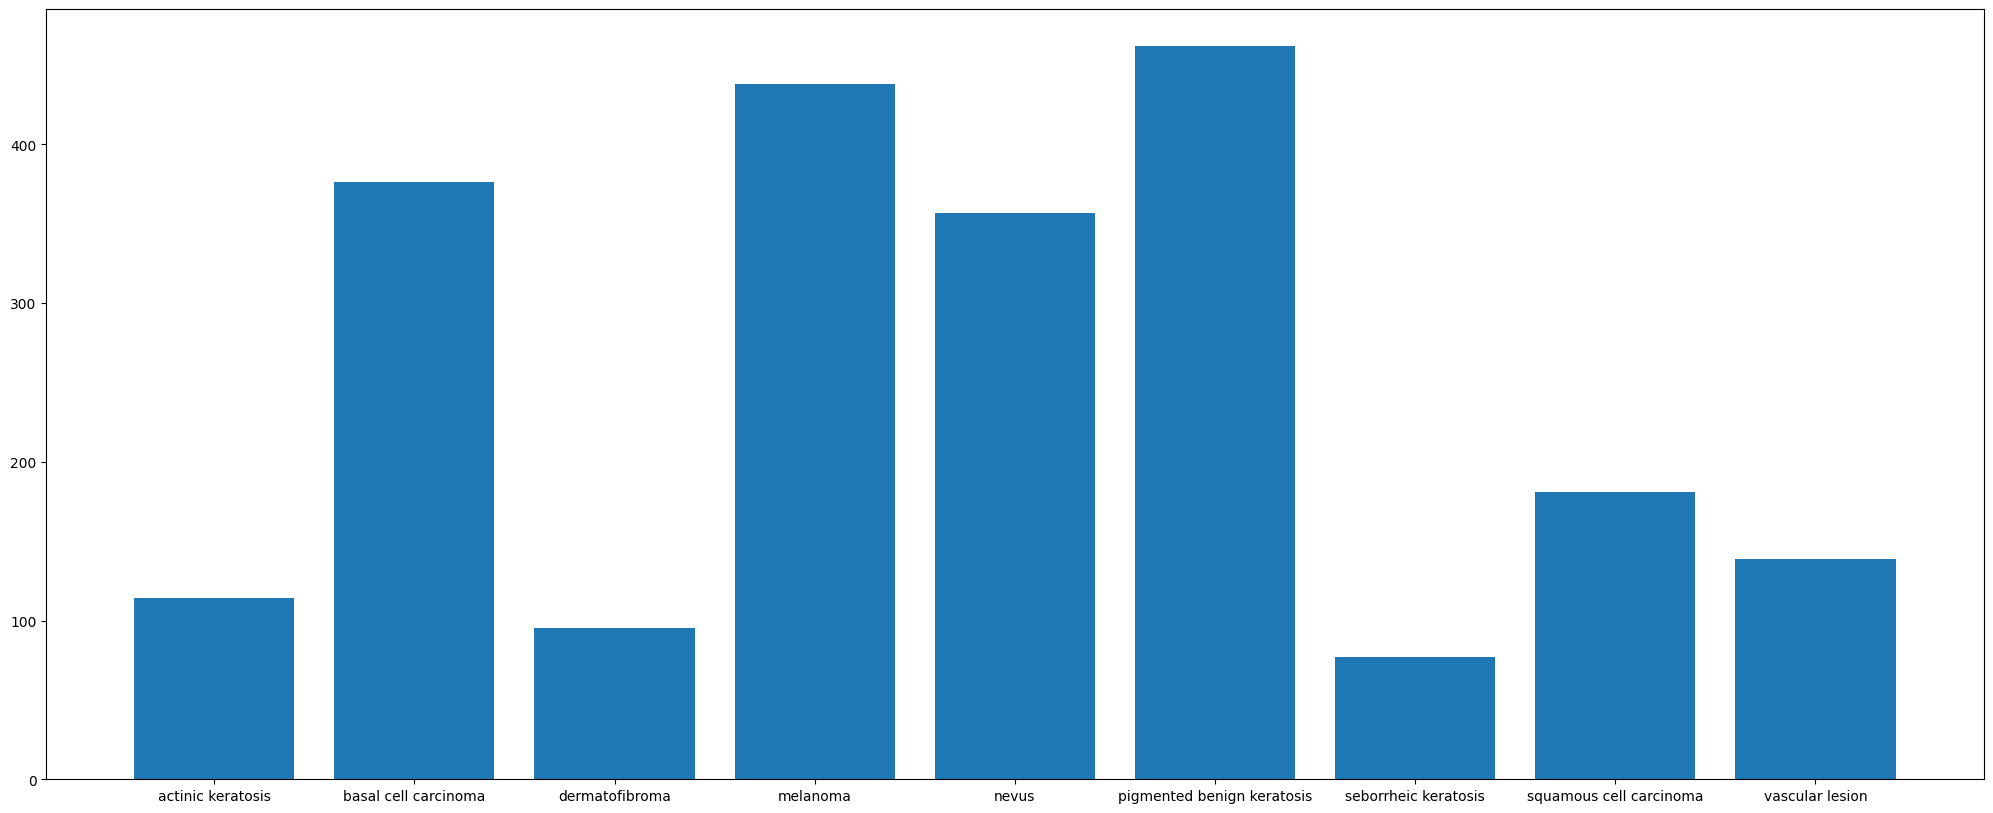

In [28]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### Findings from graph
#### - Which class has the least number of samples?
Seborrheic keratosi class has the least number of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
Pigmented Benign keratosis classes dominate the data in terms proportionate number of samples.

#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0D7BDE75E0>: 100%|██████████| 500/500 [00:38<00:00, 13.12 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0D7BCFCF70>: 100%|██████████| 500/500 [00:34<00:00, 14.46 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0E3503B250>: 100%|██████████| 500/500 [00:28<00:00, 17.76 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F0D8848BE80>: 100%|██████████| 500/500 [02:06<00:00,  3.95 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=962x723 at 0x7F0D7B4418D0>: 100%|██████████| 500/500 [02:16<00:00,  3.67 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0D9AE03EE0>: 100%|██████████| 500/500 [00:28<00:00, 17.48 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0D7BD5DFC0>: 100%|██████████| 500/500 [01:02<00:00,  8.05 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0D7BCFFCA0>: 100%|██████████| 500/500 [00:27<00:00, 18.07 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0D884324A0>: 100%|██████████| 500/500 [00:26<00:00, 18.57 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


### Lets see the distribution of augmented data after adding new images to the original training data.

<BarContainer object of 9 artists>

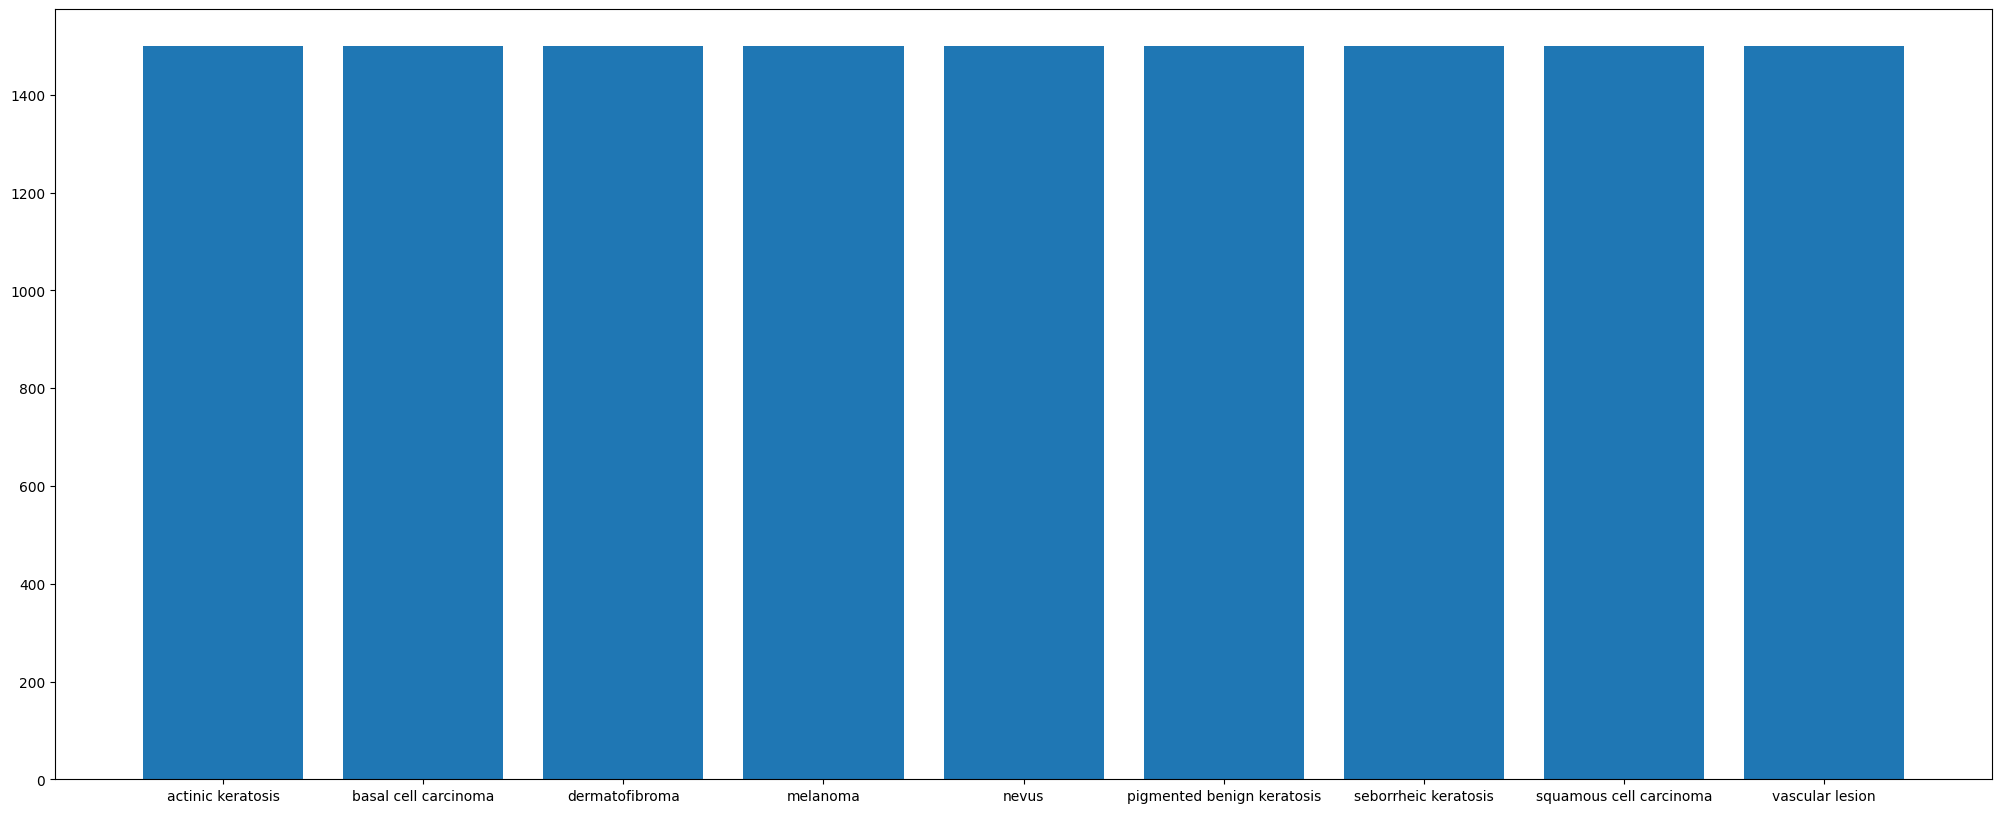

In [32]:
# Check the distribution of data again.
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [33]:
import glob

In [34]:
import os

In [35]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train,'*','output','*.jpg')) ]
path_list_new

['/content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010995.jpg_7ae0ef4c-9aa8-4c18-b804-653623f81d93.jpg',
 '/content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011126.jpg_da277ace-5ec1-4499-9675-7c50352ca8d5.jpg',
 '/content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010890.jpg_f5c5f5ca-30e1-4718-993e-9ef62abc379e.jpg',
 '/content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010890.jpg_3f349617-ed42-41b3-b3cf-a5457195e978.jpg',
 '/content/gdrive/My Dri

In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [37]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [38]:
# Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [39]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-39-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [40]:
new_df['Label'].value_counts()

pigmented benign keratosis    1962
melanoma                      1938
basal cell carcinoma          1876
nevus                         1857
squamous cell carcinoma       1681
vascular lesion               1639
actinic keratosis             1614
dermatofibroma                1595
seborrheic keratosis          1577
Name: Label, dtype: int64

So, now we have added atleast 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Model 3
#### Train the model on the data created using Augmentor

In [11]:
batch_size = 32
img_height = 180
img_width = 180

Create a training dataset

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


#### Create a validation dataset

In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


#### Create your model with normalization

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(tot_classes)
])

#### Compile your model (Choose optimizer and loss function appropriately)

In [18]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train your model

In [19]:
epochs = 30

history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
394/394 [==============================] - 638s 1s/step - loss: 1.6131 - accuracy: 0.3782 - val_loss: 1.2272 - val_accuracy: 0.5269
Epoch 2/30
394/394 [==============================] - 528s 1s/step - loss: 1.0843 - accuracy: 0.5983 - val_loss: 0.9780 - val_accuracy: 0.6317
Epoch 3/30
394/394 [==============================] - 518s 1s/step - loss: 0.7769 - accuracy: 0.7228 - val_loss: 0.7037 - val_accuracy: 0.7480
Epoch 4/30
394/394 [==============================] - 518s 1s/step - loss: 0.5569 - accuracy: 0.8096 - val_loss: 0.6210 - val_accuracy: 0.7836
Epoch 5/30
394/394 [==============================] - 517s 1s/step - loss: 0.4121 - accuracy: 0.8558 - val_loss: 0.5603 - val_accuracy: 0.8090
Epoch 6/30
394/394 [==============================] - 523s 1s/step - loss: 0.3456 - accuracy: 0.8798 - val_loss: 0.4082 - val_accuracy: 0.8529
Epoch 7/30
394/394 [==============================] - 519s 1s/step - loss: 0.2812 - accuracy: 0.9019 - val_loss: 0.3557 - val_accuracy: 0.8939

In [24]:
## Define function to visualize results
def results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

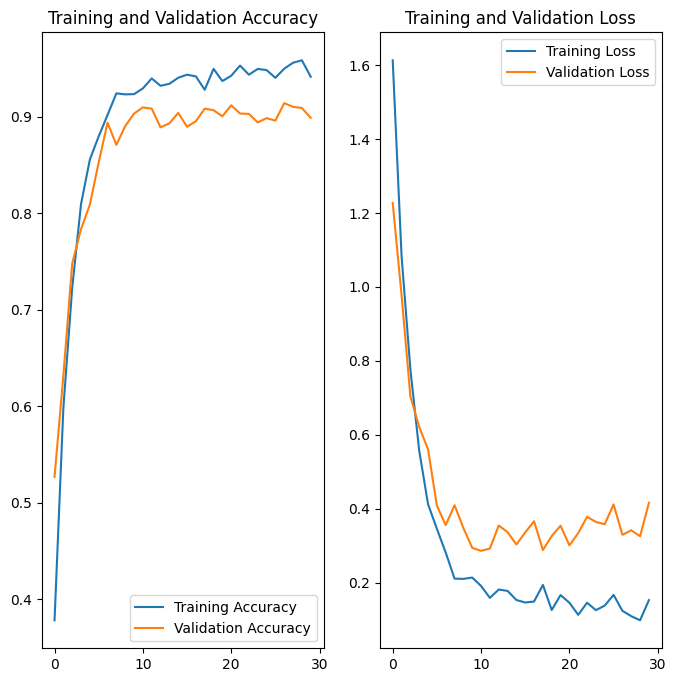

In [25]:
results (history)

#### **Findings from Model 3**

Accuracy of training and validation has been increased significantly due to augmentation and class imbalance handling. The model is not overfitting. This model can be used as final model.

- **Training Accuracy:** 94.16
- **Validation Accuracy:** 89.90

#### **FINAL SUMMARY**

Accuracy for the 3 different models are listed below,
-**Model 1 - Training Accuracy 95.66, Validation accuracy 86.07**
-**Model 2 - Training Accuracy 82.78, Validation accuracy 81.09** (data augmentation)
-**Model 3 - Training Accuracy 94.16, Validation accuracy 89.90**
(data augmentation and Class Imbalance handling)

Accuracy of training and validation has been increased significantly in the last model3, due to augmentation and class imbalance handling.